In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
!pip3 install nltk
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [4]:
!pip3 install wordcloud
from wordcloud import WordCloud

  Using cached https://files.pythonhosted.org/packages/35/13/e580e08520a50fa0bd53a6a4025699534aafd78611bd283c73b4ffa99e80/wordcloud-1.6.0-cp35-cp35m-manylinux1_x86_64.whl


In [5]:
!pip3 install tweet-preprocessor
import preprocessor as pp

In [6]:
!pip3 install smart_open
!pip3 install gensim
from gensim.models import KeyedVectors

  Using cached https://files.pythonhosted.org/packages/b1/34/816b55681c88d6a5a90ca08978d5364e9c5b14cf6fb0e6e2bec44b2b7694/boto3-1.12.42-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/10/c0b78c27298029e4454a472a1919bde20cb182dab1662cec7f2ca1dcc523/boto-2.49.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/43/1e939e1fcd87b827fe192d0c9fc25b48c5b3368902bfb913de7754b0dc03/jmespath-0.9.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/58/70/30c9c3d8ddd6c88a64bd79743ecfb6d81f152e32688030e4efb3b0134e3b/botocore-1.15.42-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/79/e6afb3d8b0b4e96cefbdc690f741d7dd24547ff1f94240c997a26fa908d3/s3transfer-0.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/54/cc/f70b45b7b5066ff93f7b5b1394e605a1fb54324dd063cec6849738ea617f/gensim-3.8.2-cp35-cp35m-manylinux1_x86_64.whl


unable to import 'smart_open.gcs', disabling that module


In [7]:
!pip3 install keras==2.1.5
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model

  Using cached https://files.pythonhosted.org/packages/ba/65/e4aff762b8696ec0626a6654b1e73b396fcc8b7cc6b98d78a1bc53b85b48/Keras-2.1.5-py2.py3-none-any.whl


/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [9]:
data_dir = "../datalab/data"
!ls {data_dir}

contractions.json  depression.csv  depressionDiary.csv	Normal.csv


In [10]:
encoding = 'ISO-8859-1'
col_names = ['target','id','date','flag','user','tweet']

dataset = pd.read_csv(os.path.join(data_dir,'Normal.csv'), encoding = encoding, names = col_names)
dataset.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
normal = dataset.copy().sample(8000,random_state=42)
normal["label"] = 0
normal = normal[['tweet','label']]
normal.dropna(inplace=True)
normal.head()

,tweet,label
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0


In [12]:
col_names = ['id','conversation','created_at','date','time','timezone','user_id','username','name','place','tweet','mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','cashtags','link','retweet','quote_url','video','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest']
depression = pd.read_csv(os.path.join(data_dir,'depression.csv'))
depression = depression[['tweet']]
depression['label']=1
depression.dropna(inplace=True)
depression.head()

,tweet,label
0,Got diagnosed with major depression lololol h...,1
1,LMFAO at that point i was just trying to recov...,1
2,Trump wants lose in November. Then he can bla...,1
3,Tanya Oxtoby: Bristol City Women boss can see ...,1
4,Ive been struggling alot with my disorders on ...,1


In [13]:
normal.info()
depression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 541200 to 705278
Data columns (total 2 columns):
tweet    8000 non-null object
label    8000 non-null int64
dtypes: int64(1), object(1)
memory usage: 187.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8245 entries, 0 to 8662
Data columns (total 2 columns):
tweet    8245 non-null object
label    8245 non-null int64
dtypes: int64(1), object(1)
memory usage: 193.2+ KB


In [14]:
data = pd.concat([normal,depression])
data = data.sample(frac = 1)
data.head()

contractions = pd.read_json(os.path.join(data_dir,'contractions.json'),typ='series')
contractions = contractions.to_dict()

In [15]:
c_re = re.compile('(%s)' %  '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
  def replace(match):
    return contractions[match.group(0)]
  return c_re.sub(replace,text)

In [16]:
BADSYMBOLS = re.compile('[^0-9a-z #+_]')

def cleanTweets(tweets):
  cleaned = []
  stopWords = ['https','com','pic','twitter']
  for tweet in tweets:
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = BADSYMBOLS.sub(' ',tweet)
    tweet = pp.clean(tweet)
    tweet = expandContractions(tweet)
    tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ",tweet).split())
    
    tokens = nltk.word_tokenize(tweet)
    sentence = [w for w in tokens if not w in stopWords]
    tweet = ' '.join(sentence)
    
    cleaned.append(tweet)
    
  return cleaned

In [17]:
X = cleanTweets(data['tweet'])


In [18]:
dTweets = [cleanTweets([t for t in depression['tweet']])]
dWords = ' '.join(list(map(str,dTweets)))
dWC = WordCloud(width = 512, height = 512, collocations = False, colormap= "Blues").generate(dWords)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


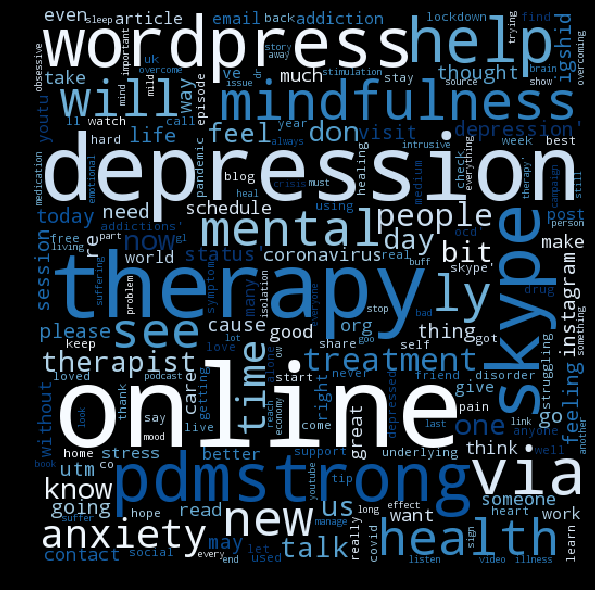

In [19]:
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(dWC)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
MAX = 30000
tokenizer = Tokenizer(num_words=MAX)
tokenizer.fit_on_texts(X)
word_vector = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

28869

In [21]:
MAX_SEQ_LENGTH = 140
input_tensor = pad_sequences(word_vector, maxlen = MAX_SEQ_LENGTH)
input_tensor.shape

(16245, 140)

In [22]:
corpus = data['tweet'].values.astype('U')
tfidf = TfidfVectorizer(max_features = MAX)
tensor = tfidf.fit_transform(corpus)
tensor.shape

(16245, 30000)

In [23]:
xTrain,xTest,yTrain,yTest = train_test_split(tensor,data['label'].values,test_size = 0.3)

baseline_model = SVC()
baseline_model.fit(xTrain,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
predictions = baseline_model.predict(xTest)
accuracy_score(yTest,predictions)

0.5059499384489126

In [25]:
print(classification_report(yTest,predictions,digits=5))

             precision    recall  f1-score   support

          0    0.00000   0.00000   0.00000      2408
          1    0.50595   1.00000   0.67193      2466

avg / total    0.25599   0.50595   0.33997      4874



/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
embedding = os.path.join("../datalab/",'GoogleNews-vectors-negative300.bin')
word2vec = KeyedVectors.load_word2vec_format(embedding, binary=True)

embeddingDim = 300
embeddingMatrix = np.zeros((MAX,embeddingDim))

for (word, idx) in word_index.items():
  if word in word2vec.vocab and idx < MAX:
    embeddingMatrix[idx] = word2vec.word_vec(word)


In [ ]:

ip = Input(shape=(MAX_SEQ_LENGTH,))
x = Embedding(MAX, embeddingDim, weights=[embeddingMatrix])(ip)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout = 0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation = 'sigmoid')(x)


In [ ]:
model = Model(inputs=ip, outputs=x)
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

xTrain, xTest, yTrain, yTest = train_test_split(input_tensor, data['label'].values, test_size = 0.3)
model.fit(xTrain,yTrain, batch_size = 16, epochs = 10)

In [ ]:
preds = model.predict(xTest)
preds = np.round(preds.flatten())
print(classification_report(yTest,preds,digits=5))

In [ ]:
from keras.models import load_model

model.save('depression_model.h5')